# Content Based Filtering

Providing movie recommendations with the same genre.

## Data Understanding

In [2]:
import pandas as pd

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

print('Jumlah data film: ', len(movies.movieId.unique()))
print('Jumlah data penilaian film: ', len(ratings.userId.unique()))

Jumlah data film:  10329
Jumlah data penilaian film:  668


## Univariate Exploratory Data Analysis


### Movie Variabel

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [4]:
print('Banyak Data: ', len(movies.movieId.unique()))

Banyak Data:  10329


In [5]:
print('Data Genre Film')

movies.genres.unique()

Data Genre Film


array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Rating Variabel

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [9]:
print('Jumlah userId: ', len(ratings.userId.unique()))
print('Jumlah movieId: ', len(ratings.movieId.unique()))
print('Jumlah data rating: ', len(ratings))

Jumlah userId:  668
Jumlah movieId:  10325
Jumlah data rating:  105339


## Data Preprocessing

## Grouping Movie

In [10]:
import numpy as np

movie_all = np.concatenate((movies.movieId.unique(), ratings.movieId.unique()))

movie_all = np.sort(np.unique(movie_all))

print('Jumlah seluruh data movie berdasarkan movieId: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieId:  10329


### Grouping Dataset Movie and Rating

In [11]:
movieRate = pd.merge(movies, ratings, on='movieId', how='left')
movieRate

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08
...,...,...,...,...,...,...
105338,148238,A Very Murray Christmas (2015),Comedy,475.0,3.0,1.451213e+09
105339,148626,The Big Short (2015),Drama,458.0,4.0,1.452015e+09
105340,148626,The Big Short (2015),Drama,576.0,4.5,1.451688e+09
105341,148626,The Big Short (2015),Drama,668.0,4.5,1.451148e+09


## Data Preparation

### Handling Missing Value

In [12]:
movieRate.isnull().sum()

movieId      0
title        0
genres       0
userId       4
rating       4
timestamp    4
dtype: int64

In [13]:
movieRate_clean = movieRate.dropna()
movieRate

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08
...,...,...,...,...,...,...
105338,148238,A Very Murray Christmas (2015),Comedy,475.0,3.0,1.451213e+09
105339,148626,The Big Short (2015),Drama,458.0,4.0,1.452015e+09
105340,148626,The Big Short (2015),Drama,576.0,4.5,1.451688e+09
105341,148626,The Big Short (2015),Drama,668.0,4.5,1.451148e+09


In [14]:
movieRate_clean.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

### Double-check the movieRate Data

In [15]:
fix_movieRate = movieRate_clean.sort_values('movieId', ascending=True)
fix_movieRate

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
147,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,435.0,4.0,9.744231e+08
148,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,437.0,2.5,1.436230e+09
149,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,439.0,5.0,8.648470e+08
150,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,440.0,5.0,9.626801e+08
...,...,...,...,...,...,...
105338,148238,A Very Murray Christmas (2015),Comedy,475.0,3.0,1.451213e+09
105340,148626,The Big Short (2015),Drama,576.0,4.5,1.451688e+09
105341,148626,The Big Short (2015),Drama,668.0,4.5,1.451148e+09
105339,148626,The Big Short (2015),Drama,458.0,4.0,1.452015e+09


In [16]:
len(fix_movieRate.movieId.unique())

10325

In [17]:
fix_movieRate = fix_movieRate.drop_duplicates('movieId')
fix_movieRate

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
298,2,Jumanji (1995),Adventure|Children|Fantasy,493.0,3.5,1.218333e+09
364,3,Grumpier Old Men (1995),Comedy|Romance,461.0,2.5,1.242375e+09
392,4,Waiting to Exhale (1995),Comedy|Drama|Romance,575.0,2.0,9.399765e+08
438,5,Father of the Bride Part II (1995),Comedy,439.0,3.0,8.648471e+08
...,...,...,...,...,...,...
105336,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,622.0,4.0,1.447457e+09
105337,146878,Le Grand Restaurant (1966),Comedy,622.0,2.5,1.447515e+09
105338,148238,A Very Murray Christmas (2015),Comedy,475.0,3.0,1.451213e+09
105340,148626,The Big Short (2015),Drama,576.0,4.5,1.451688e+09


In [18]:
movie_id = fix_movieRate['movieId'].tolist()

movie_name = fix_movieRate['title'].tolist()

movie_genre = fix_movieRate['genres'].tolist()

print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

10325
10325
10325


In [19]:
movieData = pd.DataFrame({
    'id': movie_id,
    'title': movie_name,
    'genre': movie_genre
})

movieData

,id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10320,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10321,146878,Le Grand Restaurant (1966),Comedy
10322,148238,A Very Murray Christmas (2015),Comedy
10323,148626,The Big Short (2015),Drama


## Model Development: Content Based Filtering

In [20]:
data = movieData
data.sample(5)

,id,title,genre
3840,4932,Dressed to Kill (1980),Mystery|Thriller
1016,1257,Better Off Dead... (1985),Comedy|Romance
2141,2681,Free Enterprise (1998),Comedy|Romance|Sci-Fi
9956,111360,Lucy (2014),Action|Sci-Fi
2870,3627,Carnival of Souls (1962),Horror|Thriller


### TF-IDF Vectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(data['genre'])

tf.get_feature_names_out

<bound method CountVectorizer.get_feature_names_out of TfidfVectorizer()>

In [22]:
tfidf_matrix = tf.fit_transform(data['genre'])

tfidf_matrix.shape

(10325, 24)

In [23]:
tfidf_matrix.todense()

matrix([[0.        , 0.40402049, 0.53943894, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.50526447, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [24]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=data.title
).sample(22, axis=1).sample(10, axis=0)

,noir,musical,crime,thriller,adventure,film,no,genres,fi,children,...,imax,fantasy,horror,documentary,drama,western,mystery,comedy,listed,action
title,,,,,,,,,,,,,,,,,,,,,
Chuck Berry Hail! Hail! Rock 'n' Roll (1987),0.0,0.708323,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.705888,0.000000,0.0,0.0,0.000000,0.0,0.000000
In the Mouth of Madness (1995),0.0,0.000000,0.000000,0.607926,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.793994,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
"Inkwell, The (1994)",0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.629253,0.0,0.0,0.777201,0.0,0.000000
Dread (2009),0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
Unzipped (1995),0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
Annie (2014),0.0,0.663243,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.619731,...,0.0,0.0,0.000000,0.000000,0.264019,0.0,0.0,0.326094,0.0,0.000000
Shade (2003),0.0,0.000000,0.696820,0.598809,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.394804,0.0,0.0,0.000000,0.0,0.000000
Last Man Standing (1996),0.0,0.000000,0.583485,0.501415,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.330591,0.0,0.0,0.000000,0.0,0.546661
Gold Diggers: The Secret of Bear Mountain (1995),0.0,0.000000,0.000000,0.000000,0.627426,0.0,0.0,0.0,0.0,0.778676,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


### Consine Similarity

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.79962182, 0.15894611, ..., 0.26383816, 0.        ,
        0.        ],
       [0.79962182, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15894611, 0.        , 1.        , ..., 0.60243793, 0.        ,
        0.        ],
       ...,
       [0.26383816, 0.        , 0.60243793, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [26]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape: ', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape:  (10325, 10325)


title,Grandma's Boy (2006),Grease (1978),"Quick and the Dead, The (1995)",Brideshead Revisited (2008),Summertime (1955)
title,,,,,
Vertical Limit (2000),0.000000,0.000000,0.300680,0.000000,0.000000
Jumper (2008),0.000000,0.000000,0.326067,0.234425,0.122239
Larry Crowne (2011),0.541462,0.568287,0.000000,0.438390,0.840725
"Like Father, Like Son (Soshite chichi ni naru) (2013)",0.000000,0.000000,0.000000,1.000000,0.521442
Everest (1998),0.000000,0.000000,0.000000,0.000000,0.000000
"Manhattan Project, The (1986)",0.350600,0.133548,0.180400,0.000000,0.000000
"Man, The (2005)",0.454806,0.173241,0.278159,0.000000,0.000000
"Twilight Saga: New Moon, The (2009)",0.000000,0.214465,0.165043,0.259695,0.498032
"Book of Eli, The (2010)",0.000000,0.000000,0.279362,0.369823,0.192841


### Get Recommendation

In [27]:
def movie_recommendations(nama_movie, similarity_data = cosine_sim_df, items=data[['title','genre']], k=5):
  index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(range(-1, -k, -1))

  closest = similarity_data.columns[index[-1:-(k+2):-1]]

  closest = closest.drop(nama_movie, errors='ignore')

  return pd.DataFrame(closest).merge(items).head(k)

In [28]:
data[data.title.eq('Million Dollar Hotel, The (2001)')]

,id,title,genre
3262,4146,"Million Dollar Hotel, The (2001)",Drama|Mystery|Romance


In [29]:
movie_recommendations('Million Dollar Hotel, The (2001)')

,title,genre
0,Lulu on the Bridge (1998),Drama|Mystery|Romance
1,Red White & Blue (2010),Drama|Mystery|Romance
2,Passion of Mind (2000),Drama|Mystery|Romance
3,"Past, The (Le passé) (2013)",Drama|Mystery|Romance
4,Chungking Express (Chung Hing sam lam) (1994),Drama|Mystery|Romance


# Collaborative Filtering
Providing movie recommendations based on user preferences.

## Data Understanding

In [30]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [32]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


## Data Preparation

In [33]:
user_id = df['userId'].unique().tolist()
print('Daftar userId: ', user_id)

userId_to_encoded = {x: i for i, x in enumerate(user_id)}
print('Encoded userId: ', userId_to_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_id)}
print('Encoded Angka ke userId: ', user_encoded_to_user)

Daftar userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2

In [34]:
movie_id = df['movieId'].unique().tolist()
print('Daftar movieId: ', movie_id)

movieId_to_encoded = {x: i for i, x in enumerate(movie_id)}
print('Encoded movieId: ', movieId_to_encoded)

movie_encoded_to_movie = {i: x for i, x in enumerate(movie_id)}
print('Encoded Angka ke movieId: ', movie_encoded_to_movie)

Daftar movieId:  [16, 24, 32, 47, 50, 110, 150, 161, 165, 204, 223, 256, 260, 261, 277, 296, 318, 349, 356, 377, 380, 457, 480, 527, 589, 590, 592, 593, 597, 608, 648, 719, 724, 736, 780, 858, 912, 968, 1061, 1089, 1136, 1196, 1198, 1210, 1213, 1220, 1221, 1222, 1233, 1243, 1258, 1265, 1267, 1270, 1287, 1580, 1617, 1721, 1923, 1961, 2021, 2028, 2105, 2161, 2194, 2396, 2407, 2455, 2467, 2502, 2542, 2571, 2628, 2716, 2728, 2762, 2858, 2947, 2959, 3256, 3421, 3578, 4011, 4027, 4033, 4085, 4262, 4306, 4963, 4993, 4995, 5349, 5378, 5418, 5445, 5952, 6365, 6711, 6807, 7153, 8825, 8961, 32587, 33493, 33794, 33834, 45950, 48516, 48780, 49272, 52973, 54286, 57949, 1, 3, 5, 14, 17, 25, 36, 52, 58, 62, 79, 95, 112, 376, 494, 637, 661, 784, 788, 802, 805, 1073, 1356, 7, 11, 21, 34, 39, 45, 105, 141, 144, 185, 222, 232, 246, 272, 281, 292, 300, 339, 342, 345, 348, 350, 357, 367, 368, 373, 410, 417, 454, 471, 477, 485, 497, 500, 508, 509, 515, 529, 532, 537, 538, 539, 586, 587, 588, 595, 613, 800, 1

In [35]:
df['user'] = df['userId'].map(userId_to_encoded)

df['movie'] = df['movieId'].map(movieId_to_encoded)

In [37]:
num_user = len(userId_to_encoded)
print('Number of User: ', num_user)

num_movie = len(movieId_to_encoded)
print('Number of Movie: ', num_movie)

df['rating'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])
print('Min Rating: ', min_rating)

max_rating = max(df['rating'])
print('Max Rating: ', max_rating)

Number of User:  668
Number of Movie:  10325
Min Rating:  0.5
Max Rating:  5.0


In [38]:
df = df.sample(frac = 1, random_state = 42)
df

,userId,movieId,rating,timestamp,user,movie
41032,285,2605,3.0,974036328,284,1575
1938,24,897,4.0,963472695,23,1118
92480,607,4016,4.0,979339130,606,318
30160,219,3981,2.0,1011718777,218,2522
28079,203,546,2.0,955137146,202,407
...,...,...,...,...,...,...
54886,402,780,2.5,1172355892,401,34
76820,541,2334,4.0,1004508382,540,2489
103694,668,55288,2.5,1242489706,667,2733
860,11,377,3.0,850815719,10,19


In [39]:
x = df[['user','movie']].values

y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[ 284 1575]
 [  23 1118]
 [ 606  318]
 ...
 [ 667 2733]
 [  10   19]
 [ 127 1983]] [0.55555556 0.77777778 0.77777778 ... 0.44444444 0.55555556 0.55555556]


## Data Processing

In [40]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_user, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_user = num_user
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( 
        num_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_user, 1) 
    self.movie_embedding = layers.Embedding( 
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) 

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    movie_vector = self.movie_embedding(inputs[:, 1]) 
    movie_bias = self.movie_bias(inputs[:, 1]) 
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [41]:
model = RecommenderNet(num_user, num_movie, 50) 
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [43]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
10534/10534 [==============================] - 100s 9ms/step - loss: 0.6228 - root_mean_squared_error: 0.2218 - val_loss: 0.6074 - val_root_mean_squared_error: 0.2033
Epoch 2/100
10534/10534 [==============================] - 97s 9ms/step - loss: 0.6009 - root_mean_squared_error: 0.1980 - val_loss: 0.6031 - val_root_mean_squared_error: 0.1983
Epoch 3/100
10534/10534 [==============================] - 95s 9ms/step - loss: 0.5962 - root_mean_squared_error: 0.1926 - val_loss: 0.6023 - val_root_mean_squared_error: 0.1971
Epoch 4/100
10534/10534 [==============================] - 98s 9ms/step - loss: 0.5937 - root_mean_squared_error: 0.1896 - val_loss: 0.6023 - val_root_mean_squared_error: 0.1971
Epoch 5/100
10534/10534 [==============================] - 95s 9ms/step - loss: 0.5917 - root_mean_squared_error: 0.1872 - val_loss: 0.6010 - val_root_mean_squared_error: 0.1955
Epoch 6/100
10534/10534 [==============================] - 95s 9ms/step - loss: 0.5905 - root_mean_squared_er

### Visualization Metrics

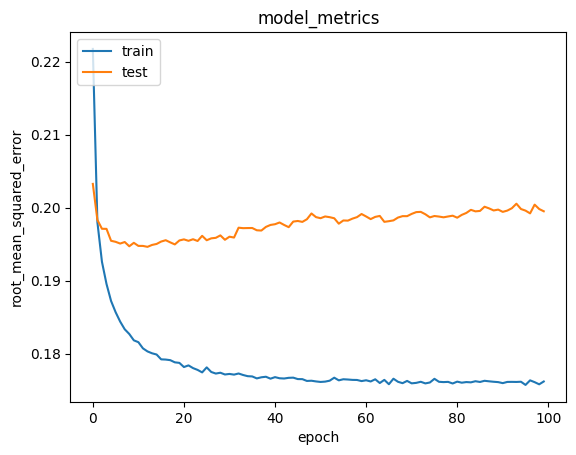

In [44]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model Development: Collaborative Filtering

In [45]:
movie_df = movieData
df = pd.read_csv('ratings.csv')

user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

movie_not_visited = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_visited = list(
    set(movie_not_visited).intersection(set(movieId_to_encoded.keys()))
)

movie_not_visited = [[movieId_to_encoded.get(x)] for x in movie_not_visited]
user_encoder = userId_to_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

### Get Recommendation

In [52]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movieId_to_encoded.get(movie_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genre)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genre)

313/313 [==============================] - 1s 2ms/step
Showing recommendations for users: 315
movie with high ratings from user
--------------------------------
Ran (1985) : Drama|War
Treasure of the Sierra Madre, The (1948) : Action|Adventure|Drama|Western
M (1931) : Crime|Film-Noir|Thriller
Lord of the Rings: The Fellowship of the Ring, The (2001) : Adventure|Fantasy
Sherlock Holmes Faces Death (1943) : Crime|Mystery
--------------------------------
Top 10 movie recommendation
--------------------------------
To Catch a Thief (1955) : Crime|Mystery|Romance|Thriller
Angela's Ashes (1999) : Drama
My Life (1993) : Drama
Flying Tigers (1942) : Action|Drama|Romance|War
Tokyo Godfathers (2003) : Adventure|Animation|Drama
